## **CNN**

clone git for dataset

load the data

In [1]:
import keras

batch_size=32
image_size=(224,224)
train_dir = r"/kaggle/input/threat/new hawk/Hawk_Eye_dataset/train"
test_dir = "/kaggle/input/threat/new hawk/Hawk_Eye_dataset/test"



train_ds=keras.utils.image_dataset_from_directory(train_dir,validation_split=None,subset=None,shuffle=True,seed=1337,image_size=image_size,batch_size=batch_size)

test_ds=keras.utils.image_dataset_from_directory(test_dir,validation_split=None,subset=None,shuffle=True,seed=1337,image_size=image_size,batch_size=batch_size)
val_dir=r"/kaggle/input/threat/new hawk/Hawk_Eye_dataset/validation"
val_ds=keras.utils.image_dataset_from_directory(val_dir,validation_split=None,shuffle=True,subset=None,seed=1337,image_size=image_size,batch_size=batch_size)


Found 6925 files belonging to 9 classes.
Found 2346 files belonging to 9 classes.
Found 2090 files belonging to 9 classes.


In [2]:
train_ds=train_ds.concatenate(test_ds)
test_ds=val_ds

In [3]:
len(train_ds)

291

model 

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D,BatchNormalization,Flatten
from keras import layers
model = Sequential()

model.add(layers.RandomFlip("horizontal")) 
model.add(layers.RandomTranslation(0.2, 0.2)) 
model.add(layers.RandomRotation(0.1)) 
model.add(layers.RandomZoom(0.2)) 
model.add(layers.Resizing(224,224)) 
model.add(layers.Rescaling(1./255)) 
###############################################
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape =(200,200,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

###############################################
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape =(97,97,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

###############################################
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape =(46,46,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
##############################################

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape =(21,21,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

################################################

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Training 

In [5]:
import tensorflow as tf
tf.__version__
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D,BatchNormalization,Flatten

model.compile(optimizer="adamw",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

import tensorflow as tf


epochs = 100
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)



Epoch 1/100


2024-04-20 09:26:54.470153: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


291/291 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.4821 - loss: 1.8680 - val_accuracy: 0.3990 - val_loss: 1.8476
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.6249 - loss: 1.1479 - val_accuracy: 0.6598 - val_loss: 1.1644
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.6650 - loss: 1.0107 - val_accuracy: 0.6531 - val_loss: 1.3780
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.6959 - loss: 0.8964 - val_accuracy: 0.6684 - val_loss: 1.3914
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.7142 - loss: 0.8368 - val_accuracy: 0.7201 - val_loss: 0.9219
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.7441 - loss: 0.7642 - val_accuracy: 0.7531 - val_loss: 0.7998
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.7522 - loss: 0.7500 - val_accuracy: 0.7100 - val_loss: 0.8416
Epoch 8/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.7599 - loss: 0.7205 - val

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 224, 224, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 28,625,277 (109.20 MB)

 Trainable params: 9,541,257 (36.40 MB)

 Non-trainable params: 1,504 (5.88 KB)

 Optimizer params: 19,082,516 (72.79 MB)

In [7]:
model.save_weights(".weights.h5")
print("Saved model to disk")

Saved model to disk


plot the training

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

calculating the metrics

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score



y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [10]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8930656264674306
Recall: 0.8904306220095694
F1 Score: 0.8876899756364561


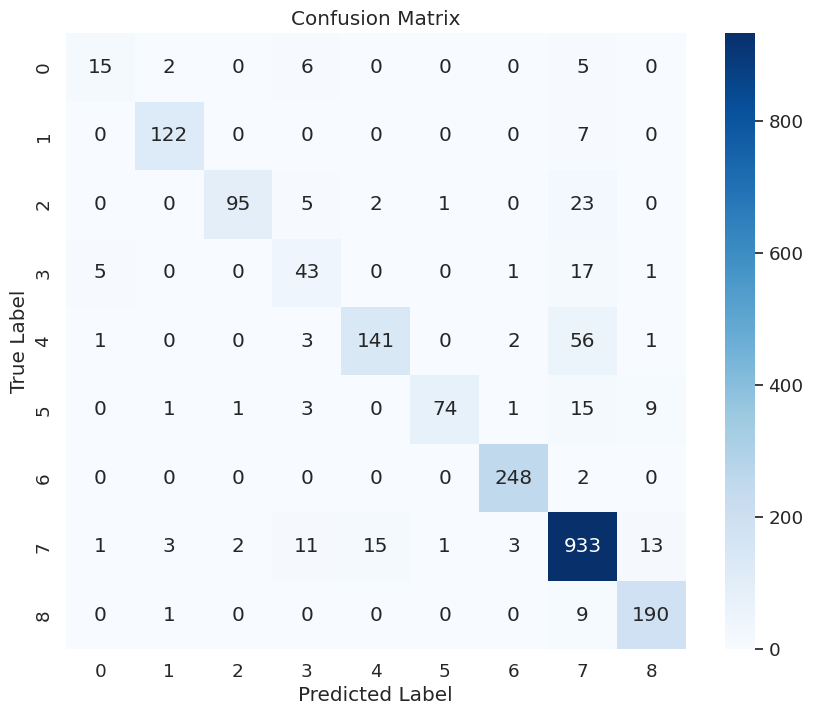

In [11]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_true, y_pred)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [12]:
#sunflower_url = "https://th.bing.com/th/id/OIP.za3YcR7TuhET5rAPTTBtvQHaHa?w=192&h=193&c=7&r=0&o=5&dpr=1.3&pid=1.7"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
class_names=val_ds.class_names
print(class_names)
path='/kaggle/input/threat/new hawk/Hawk_Eye_dataset/validation/Car/04574.jpg'
img = tf.keras.utils.load_img(
   path, target_size=(224,224)
)



img_array = np.expand_dims(img, axis=0)
predictions = model.predict(img_array)
score = predictions[0]
val = np.argmax(score)
print(score)


print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)

['Bat', 'Car', 'Grenade', 'Knife', 'Machine Guns', 'Masked Face', 'Motorcycle', 'Pistol', 'face']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
[9.3334512e-07 9.9989426e-01 9.6093189e-10 1.5524859e-06 6.5619759e-07
 5.7074153e-13 7.2905486e-08 1.0247918e-04 4.8972968e-11]
This image most likely belongs to Car 


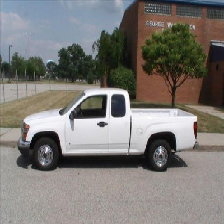

In [13]:
img

In [14]:
print(predictions)

[[9.3334512e-07 9.9989426e-01 9.6093189e-10 1.5524859e-06 6.5619759e-07
  5.7074153e-13 7.2905486e-08 1.0247918e-04 4.8972968e-11]]
